This work is using this [dataset](https://drive.google.com/file/d/1s6oeK0jpsa5HIlOR03R0jrMMfOsxfnVP/view?usp=sharing)

# Import Data

In [1]:
#importing package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read csv
path = ('/content/drive/My Drive/Rakamin/Mini Project 03/marketing_campaign_data.csv')
df = pd.read_csv(path)

#showing all columns
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Feature Engineering

In [4]:
df['Age'] = 2022 - df['Year_Birth'] #add Age feature (age in 2022)
df['Total_Child'] = df['Kidhome'] + df['Teenhome'] #add Total Child feature
df['Total_Spend'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'] #add Total Spent customer
df['Total_Transaction'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] +df['NumStorePurchases'] #add Total Transaction from various media
df['Total_Acc_Campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] #add Total Accepted Campaign
df['Is_Parents'] = np.where(df['Total_Child'] >0,1,0) #add is_parents feature

#add Conversion Rate feature
def conversion(x,y):
    if y == 0:
        return 0
    return x / y

df['Conversion_Rate'] = df.apply(lambda x: conversion(x['Total_Transaction'],x['NumWebVisitsMonth']), axis=1)

In [5]:
#grouping customers Age
age_group_list = []
for i, kolom in df.iterrows():
    prefix = kolom['Age']
    if prefix <= 45 :
        age = 'Young'
    elif prefix <= 60 :
        age = 'Middle'
    else :
        age = 'Elderly'
    age_group_list.append(age)
df['Age_Group'] = age_group_list

In [6]:
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Child,Total_Spend,Total_Transaction,Total_Acc_Campaign,Is_Parents,Conversion_Rate,Age_Group
1845,1845,7872,1975,S3,Menikah,86836000.0,0,0,12-09-2012,7,179000,21000,273000,0,21000,63000,1,6,10,6,5,1,0,1,1,0,0,3,11,1,47,0,557000,23,3,0,4.600000,Middle
493,493,9426,1964,S2,Lajang,58308000.0,0,1,12-01-2013,77,691000,0,69000,10000,0,130000,4,2,6,3,8,0,0,0,0,0,0,3,11,0,58,1,900000,15,0,1,1.875000,Middle
2139,2139,2715,1966,S2,Cerai,29435000.0,1,1,06-08-2012,11,70000,3000,37000,4000,2000,64000,4,3,2,2,9,0,0,0,0,0,0,3,11,1,56,2,180000,11,0,1,1.222222,Middle
1090,1090,1127,1973,S3,Menikah,85844000.0,0,0,29-05-2014,62,938000,19000,843000,25000,95000,38000,1,6,6,7,2,0,0,1,0,0,0,3,11,0,49,0,1958000,20,1,0,10.000000,Middle
1968,1968,8537,1949,S1,Janda,72643000.0,0,0,27-02-2013,60,526000,80000,553000,123000,94000,53000,1,3,10,7,2,0,0,0,1,0,0,3,11,1,73,0,1429000,21,1,0,10.500000,Elderly


# Exploratory Data Analysis (EDA)

## Descriptive Statistics

In [7]:
# general information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

### Statistical Summary

In [8]:
# define numerical and categorical feature
cats = ['Education','Marital_Status','Age_Group']
nums = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue','Conversion_Rate', 'Age', 'Total_Child', 'Total_Spend','Total_Transaction']
boolean = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain','Response','Is_Parents']

# statistical summary from numeric feature
df[nums].describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Conversion_Rate,Age,Total_Child,Total_Spend,Total_Transaction
count,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000
mean,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0,4.395222,53.194196,0.950446,6.057982e+05,14.862054
std,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0,4.913624,11.984069,0.751803,6.022493e+05,7.677173
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,26.000000,0.000000,5.000000e+03,0.000000
25%,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0,1.222222,45.000000,0.000000,6.875000e+04,8.000000
50%,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0,2.600000,52.000000,1.000000,3.960000e+05,15.000000
75%,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0,5.350000,63.000000,1.000000,1.045500e+06,21.000000
max,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0,43.000000,129.000000,3.000000,2.525000e+06,44.000000


In [9]:
# statistical summary from categorical feature
df[cats].describe()

,Education,Marital_Status,Age_Group
count,2240,2240,2240
unique,5,6,3
top,S1,Menikah,Middle
freq,1127,864,979


In [10]:
# statistical summary from boolean feature
df[boolean].describe()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Is_Parents
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,0.715179
std,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,0.451430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Univariate Analysis

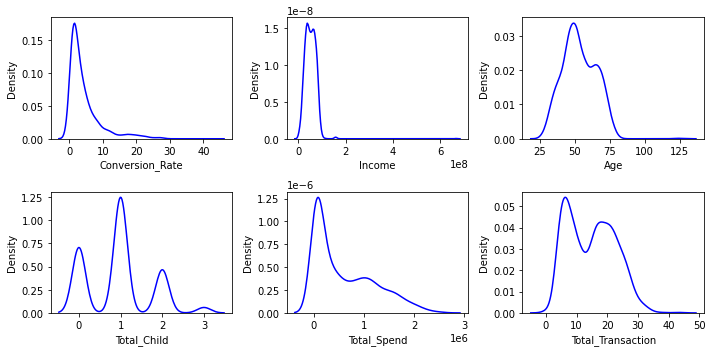

In [11]:
#showing some features distribution 
features = ['Conversion_Rate','Income','Age','Total_Child','Total_Spend','Total_Transaction']
plt.figure(figsize=(10, 5))
for i in range(0, len(features)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

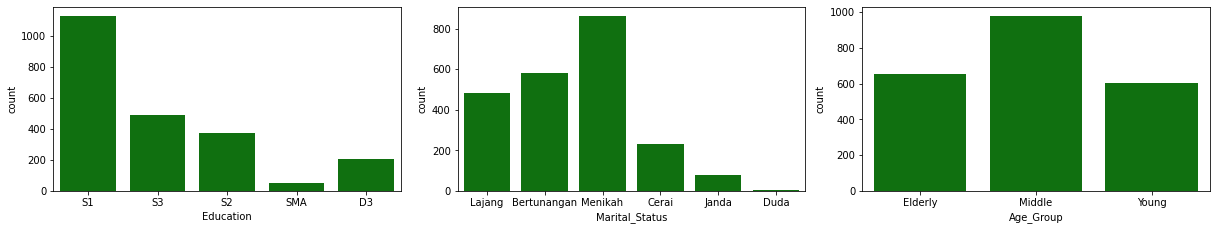

In [12]:
#categorical analysis
plt.figure(figsize = (17,6))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df[cats[i]], color='green', orient='v')
    plt.tight_layout()

### Bivariate Analysis

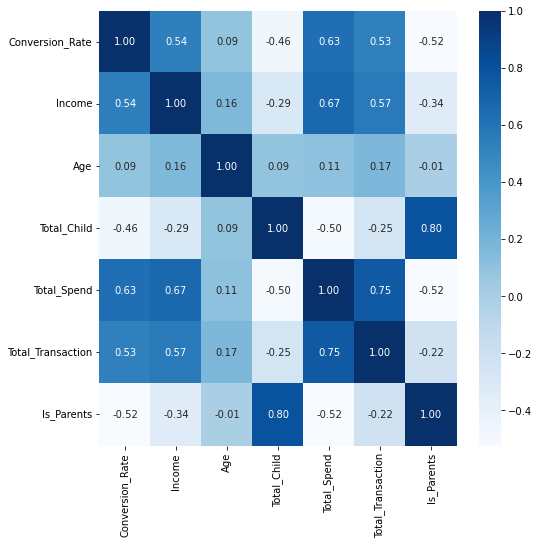

In [13]:
#new variabel
df_pairs = df[['Conversion_Rate','Education','Marital_Status','Income','Age','Age_Group','Total_Child','Total_Spend','Total_Transaction','Is_Parents']]

# correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df_pairs.corr(), cmap='Blues', annot=True, fmt='.2f')

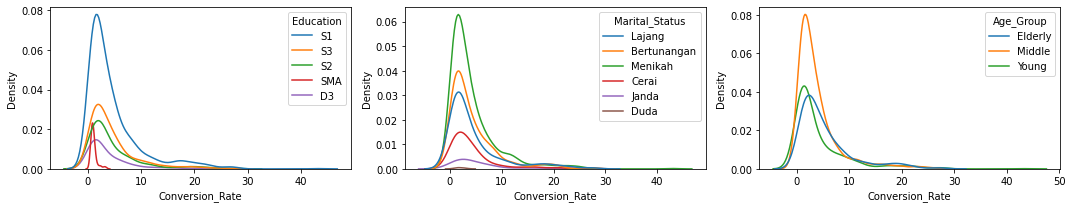

In [14]:
features = cats
plt.figure(figsize=(15, 3))
for i in range(0, len(features)):
    plt.subplot(1, 3, i+1) 
    sns.kdeplot(data=df_pairs, x='Conversion_Rate', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout()


#### Conversion Rate vs Income

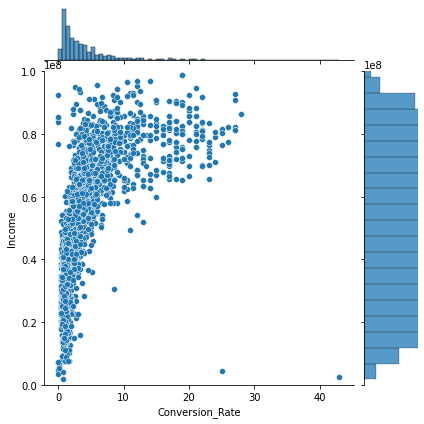

In [15]:
sns.jointplot(x='Conversion_Rate', y='Income', data = df)
plt.axis([0, 40, 0, 100000000]); #set xy-axis limit

#### Conversion Rate vs Total Spending

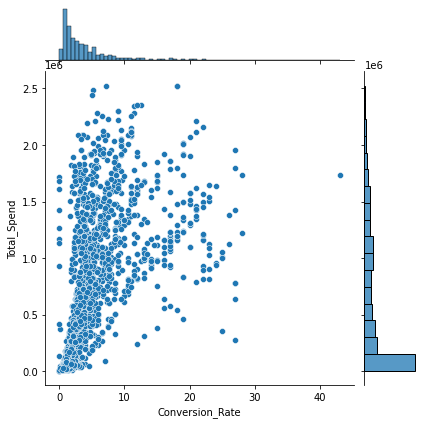

In [16]:
sns.jointplot(x='Conversion_Rate', y='Total_Spend', data = df);

#### Conversion Rate vs Age

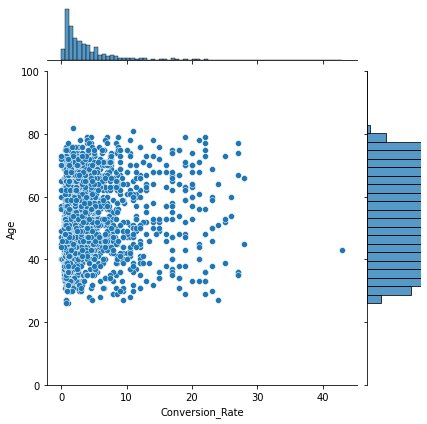

In [17]:
sns.jointplot(x='Conversion_Rate', y='Age', data = df)
plt.axis([0, 40, 0, 100]); #set xy-axis limit

# Data Preprocessing

## Missing Value

In [18]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Total_Child             0
Total_Spend             0
Total_Transaction       0
Total_Acc_Campaign      0
Is_Parents              0
Conversion_Rate         0
Age_Group               0
dtype: int64

In [19]:
# the number of missing value is quite low. we want to drop it
df = df.dropna()

# check number of rows and columns
df.shape

(2216, 38)

## Duplicated Data

In [20]:
#check duplicated data
df.duplicated().any()

False

There is no duplicated data in this dataset

## Feature Encoding

In [21]:
#label encoding for Education feature
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df['Education'] = df['Education'].map(mapping_education)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [22]:
# One hot encoding Marital_Status 
for cat in ['Marital_Status']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

# One hot encoding Age_Group
for cat in ['Age_Group']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

# One hot encoding Is_Parents 
for cat in ['Is_Parents']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)
    

In [23]:
# remove unnecessary columns
df = df.drop(columns=['Unnamed: 0','ID','Marital_Status','Age_Group','Is_Parents'])
df.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Child,Total_Spend,Total_Transaction,Total_Acc_Campaign,Conversion_Rate,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,Age_Group_Elderly,Age_Group_Middle,Age_Group_Young,Is_Parents_0,Is_Parents_1
0,1957,2,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,0,1617000,25,0,3.571429,0,0,0,0,1,0,1,0,0,1,0
1,1954,2,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,2,27000,6,0,1.200000,0,0,0,0,1,0,1,0,0,0,1
2,1965,2,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,0,776000,21,0,5.250000,1,0,0,0,0,0,0,1,0,1,0
3,1984,2,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,1,53000,8,0,1.333333,1,0,0,0,0,0,0,0,1,0,1
4,1981,4,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,1,422000,19,0,3.800000,0,0,0,0,0,1,0,0,1,0,1


## Feature Transformation (Standardization)

In [24]:
#making a copy of dataframe
df_standard = df.copy()

#some features that will be transformed
standard_num = ['Income','Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth','Age','Total_Spend','Total_Transaction','Conversion_Rate']

In [25]:
#transformation (Standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in standard_num:
    df_standard[col] = scaler.fit_transform(df_standard[[col]].values.reshape(len(df_standard),1))
    
df_standard.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Child,Total_Spend,Total_Transaction,Total_Acc_Campaign,Conversion_Rate,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,Age_Group_Elderly,Age_Group_Middle,Age_Group_Young,Is_Parents_0,Is_Parents_1
0,1957,2,0.234063,0,0,04-09-2012,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0,0,0,0,0,0,3,11,1,0.986443,0,1.675488,1.319446,0,-0.167630,0,0,0,0,1,0,1,0,0,1,0
1,1954,2,-0.234559,1,1,08-03-2014,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0,0,0,0,0,0,3,11,0,1.236801,2,-0.962358,-1.157987,0,-0.652811,0,0,0,0,1,0,1,0,0,0,1
2,1965,2,0.769478,0,0,21-08-2013,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0,0,0,0,0,0,3,11,0,0.318822,0,0.280250,0.797881,0,0.175797,1,0,0,0,0,0,0,1,0,1,0
3,1984,2,-1.017239,1,0,10-02-2014,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,0,0,0,0,0,0,3,11,0,-1.266777,1,-0.919224,-0.897205,0,-0.625532,1,0,0,0,0,0,0,0,1,0,1
4,1981,4,0.240221,1,0,19-01-2014,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,0,0,0,0,0,0,3,11,0,-1.016420,1,-0.307044,0.537099,0,-0.120865,0,0,0,0,0,1,0,0,1,0,1


# Modeling

## Elbow Method

In [26]:
# remove unnecessary columns
df_standard = df_standard.drop(columns=['Dt_Customer'])

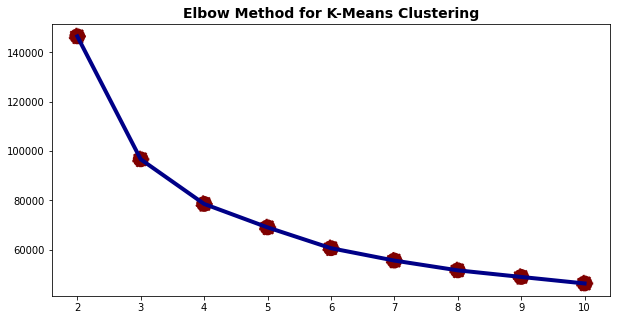

In [27]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_standard)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))

plt.title('Elbow Method for K-Means Clustering', size = 14, weight = 'bold')
sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


## K-Means Clustering

In [28]:
# make 4 clusters using k-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_standard.values)
df_standard['cluster'] = kmeans.labels_
df['cluster'] = df_standard['cluster']

df.sample(5)

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Child,Total_Spend,Total_Transaction,Total_Acc_Campaign,Conversion_Rate,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,Age_Group_Elderly,Age_Group_Middle,Age_Group_Young,Is_Parents_0,Is_Parents_1,cluster
1488,1955,2,76998000.0,0,1,11-01-2013,85,1449000,89000,161000,69000,35000,107000,2,11,8,8,6,0,0,1,0,0,0,3,11,0,67,1,1910000,29,1,4.833333,0,0,0,0,0,1,1,0,0,0,1,3
171,1982,2,28718000.0,1,0,13-07-2013,78,12000,4000,6000,11000,8000,16000,2,2,0,3,8,0,0,0,0,0,0,3,11,0,40,1,57000,7,0,0.875000,0,0,0,0,0,1,0,0,1,0,1,0
1315,1962,4,27238000.0,1,1,20-04-2013,39,37000,0,17000,0,0,3000,3,3,0,3,9,0,0,0,0,0,0,3,11,0,60,2,57000,9,0,1.000000,0,0,0,0,1,0,0,1,0,0,1,1
257,1964,2,45989000.0,0,1,22-10-2012,97,138000,33000,87000,28000,24000,12000,4,3,2,7,3,0,0,0,0,0,0,3,11,0,58,1,322000,16,0,5.333333,0,0,0,0,1,0,0,1,0,0,1,1
1238,1989,2,28691000.0,1,0,04-07-2013,56,5000,4000,13000,8000,0,4000,1,1,0,3,8,0,0,0,0,0,0,3,11,0,33,1,34000,5,0,0.625000,0,0,0,0,0,1,0,0,1,0,1,0


### Visualization

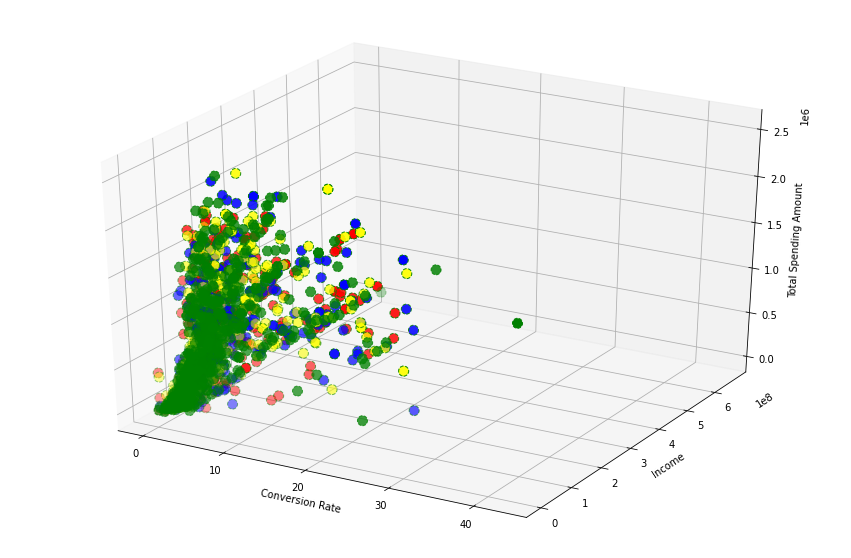

In [29]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Conversion_Rate'][df.cluster == 0], df["Income"][df.cluster == 0], df["Total_Spend"][df.cluster == 0], c='yellow', s=100, edgecolor='green',linestyle='--')
ax.scatter(df['Conversion_Rate'][df.cluster == 1], df["Income"][df.cluster == 1], df["Total_Spend"][df.cluster == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(df['Conversion_Rate'][df.cluster == 2], df["Income"][df.cluster == 2], df["Total_Spend"][df.cluster == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(df['Conversion_Rate'][df.cluster == 3], df["Income"][df.cluster == 3], df["Total_Spend"][df.cluster == 3], c='blue', s=100, edgecolor='green',linestyle='--')

plt.xlabel('Conversion Rate')
plt.ylabel("Income")
ax.set_zlabel('Total Spending Amount')
plt.show()

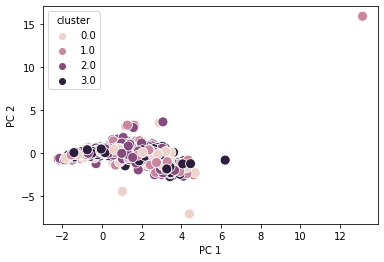

In [30]:
#make PCA
df_model = df_standard[['Conversion_Rate','Income','Total_Spend']].copy()

from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_model)
pcs = pca.transform(df_model)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = df_standard['cluster']

# make 2d cluster Visualization based on PCA
sns.scatterplot(x='PC 1', y='PC 2', hue = 'cluster', data = df_pca, s=100);

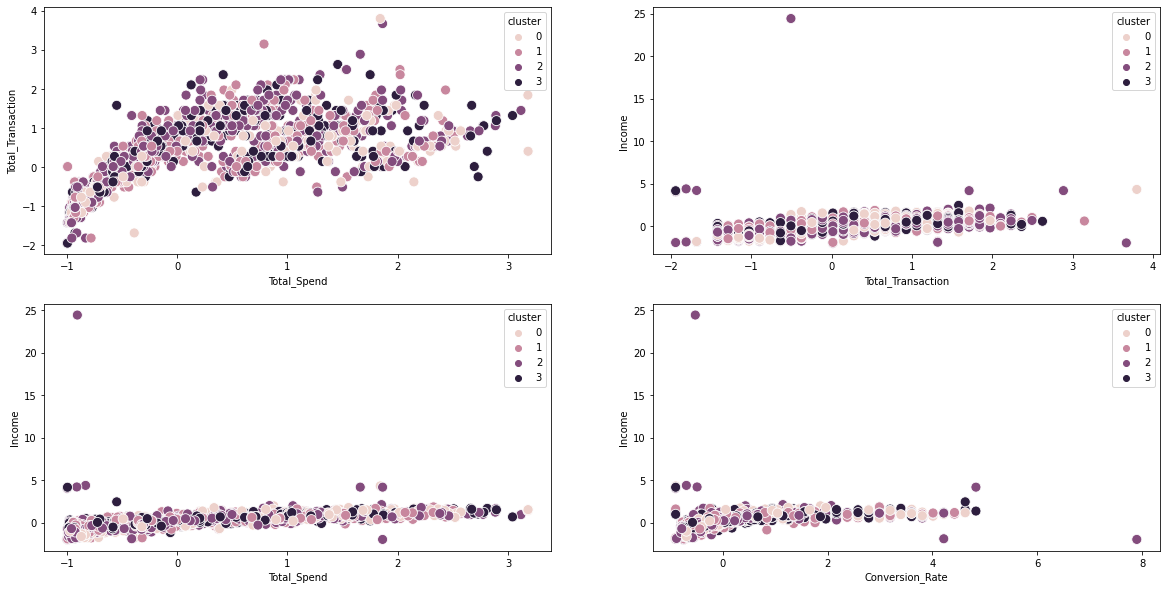

In [31]:
fig, axes = plt.subplots(2,2, figsize=(20,10))

sns.scatterplot(x='Total_Spend', y='Total_Transaction', hue='cluster', data=df_standard, s=100, ax = axes[0][0])
sns.scatterplot(y='Income', x='Total_Transaction', hue='cluster', data=df_standard, s=100, ax=axes[0][1])
sns.scatterplot(y='Income', x='Total_Spend', hue='cluster', data=df_standard, s=100, ax=axes[1][0])
sns.scatterplot(y='Income', x='Conversion_Rate', hue='cluster', data=df_standard, s=100, ax=axes[1][1])

## Silhouette Score

In [32]:
# Calculate Silhoutte Score
X = df_standard.drop(columns=['cluster'])

from sklearn.metrics import silhouette_score
score_list = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_standard)
    score = silhouette_score(X, kmeans.labels_, metric='euclidean')
    score_list.append(score)

clustering_eval = pd.DataFrame({'clusters' : [2,3,4,5,6,7,8,9,10],
                   'silhouette_score' : score_list})
clustering_eval

,clusters,silhouette_score
0,2,0.488740
1,3,0.397460
2,4,0.330578
3,5,0.270582
4,6,0.270596
5,7,0.232660
6,8,0.236571
7,9,0.232021
8,10,0.226689


# Customer Personality Analysis for Marketing Retargeting

## Statistics Analysis

In [33]:
df_clusters = df.groupby('cluster')['Conversion_Rate','Income','Total_Spend','Total_Transaction','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth','Recency'].mean().reset_index()
df_clusters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cluster,Conversion_Rate,Income,Total_Spend,Total_Transaction,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,0,4.410426,4.687531e+07,573489.260143,12.935561,1.799523,3.441527,2.400955,5.293556,5.460621,47.704057
1,1,4.644777,5.559739e+07,669619.666048,15.996289,2.421150,4.406308,2.953618,6.215213,5.050093,50.764378
2,2,3.649434,4.965200e+07,519110.846246,14.082241,2.510131,3.883194,2.281287,5.407628,5.702026,48.400477
3,3,5.528722,5.850629e+07,736343.675418,16.990453,2.348449,4.720764,3.357995,6.563246,4.756563,49.293556


In [34]:
#add cluster category
mapping_cluster = {
    0 : 'Low Spender',
    1 : 'Mid Spender',
    2 : 'Risk of Churn',
    3 : 'High Spender'
}

df['cluster_category'] = df['cluster'].map(mapping_cluster)
df_clusters['cluster_category'] = df_clusters['cluster'].map(mapping_cluster)

## Total User per Cluster Category

Text(0, 0.5, 'Total User')

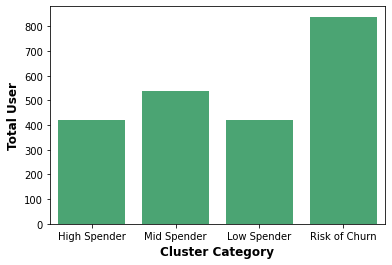

In [35]:
sns.countplot(x=df['cluster_category'], color='mediumseagreen', order=['High Spender', 'Mid Spender','Low Spender','Risk of Churn'])
plt.xlabel('Cluster Category', size=12, weight = 'bold')
plt.ylabel('Total User', size=12, weight = 'bold')

## Income per Cluster

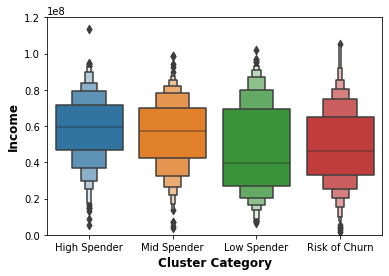

In [36]:
sns.boxenplot(x='cluster_category', y ='Income', data = df, order=['High Spender', 'Mid Spender','Low Spender','Risk of Churn'])
plt.axis([-0.5, 3.5, 0, 120000000]) #set xy-axis limit
plt.xlabel('Cluster Category', size=12, weight = 'bold')
plt.ylabel('Income', size=12, weight = 'bold');


## Amount Spending per Cluster

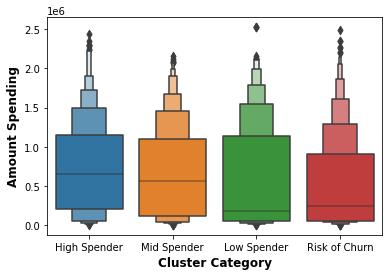

In [37]:
sns.boxenplot(x='cluster_category', y ='Total_Spend', data = df, order=['High Spender', 'Mid Spender','Low Spender','Risk of Churn'])
plt.xlabel('Cluster Category', size=12, weight = 'bold')
plt.ylabel('Amount Spending', size=12, weight = 'bold');

## Web Visit per Cluster

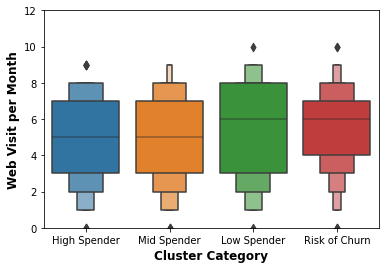

In [38]:
sns.boxenplot(x='cluster_category', y ='NumWebVisitsMonth', data = df, order=['High Spender', 'Mid Spender','Low Spender','Risk of Churn'])
plt.axis([-0.5, 3.5, 0, 12]) #set xy-axis limit
plt.xlabel('Cluster Category', size=12, weight = 'bold')
plt.ylabel('Web Visit per Month', size=12, weight = 'bold');

## Conversion Rate per Cluster

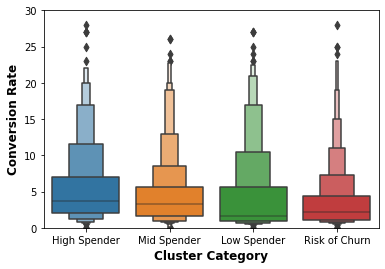

In [39]:
sns.boxenplot(x='cluster_category', y ='Conversion_Rate', data = df, order=['High Spender', 'Mid Spender','Low Spender','Risk of Churn'])
plt.axis([-0.5, 3.5, 0, 30]) #set xy-axis limit
plt.xlabel('Cluster Category', size=12, weight = 'bold')
plt.ylabel('Conversion Rate', size=12, weight = 'bold');

## Deals Purchase per Cluster

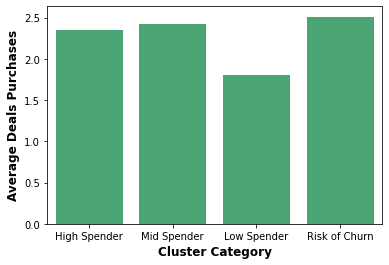

In [40]:
sns.barplot(x='cluster_category', y ='NumDealsPurchases', data = df_clusters, color='mediumseagreen', order=['High Spender', 'Mid Spender','Low Spender','Risk of Churn'])
plt.xlabel('Cluster Category', size=12, weight = 'bold')
plt.ylabel('Average Deals Purchases', size=12, weight = 'bold');

## Average Age per Cluster

In [44]:
df_age = df.groupby('cluster_category')['Age'].mean().reset_index(name='Average Age')
df_age.sort_values(by = 'Average Age', ascending  = False)

,cluster_category,Average Age
0,High Spender,70.730310
2,Mid Spender,59.699443
3,Risk of Churn,48.436234
1,Low Spender,36.739857


## Potential Impact

In [42]:
df_impact = df.groupby('cluster_category')['Total_Spend'].sum().reset_index()
df_impact.sort_values(by = 'Total_Spend')

,cluster_category,Total_Spend
1,Low Spender,240292000
0,High Spender,308528000
2,Mid Spender,360925000
3,Risk of Churn,435534000


In [43]:
(df[df.cluster_category == 'Risk of Churn'].Total_Spend.sum())*0.05 + (df[df.cluster_category == 'Low Spender'].Total_Spend.sum())*0.05

33791300.0